датасет PhishingData

In [13]:
import numpy as np
import pandas as pd

In [14]:
#загружаем датасет,указываем разделитель ','
data = pd.read_csv('PhishingData.csv', sep=',')

In [15]:
print(data)
#смотрим данные

      Unnamed: 0  SFH  popUpWidnow  SSLfinal_State  Request_URL  \
0              0    1           -1               1           -1   
1              1   -1           -1              -1           -1   
2              2    1           -1               0            0   
3              3    1            0               1           -1   
4              4   -1           -1               1           -1   
...          ...  ...          ...             ...          ...   
1348        1348   -1           -1              -1           -1   
1349        1349   -1            0               1            0   
1350        1350   -1            0              -1           -1   
1351        1351    0            0               1            0   
1352        1352    1            0               1            1   

      URL_of_Anchor  web_traffic  URL_Length  age_of_domain  \
0                -1            1           1              1   
1                -1            0           1              1   
2     

In [16]:
data.info()
# смотрим информацию о датасете
# все столбцы имеют числовой тип и не содержат пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         1353 non-null   int64
 1   SFH                1353 non-null   int64
 2   popUpWidnow        1353 non-null   int64
 3   SSLfinal_State     1353 non-null   int64
 4   Request_URL        1353 non-null   int64
 5   URL_of_Anchor      1353 non-null   int64
 6   web_traffic        1353 non-null   int64
 7   URL_Length         1353 non-null   int64
 8   age_of_domain      1353 non-null   int64
 9   having_IP_Address  1353 non-null   int64
 10  Result             1353 non-null   int64
dtypes: int64(11)
memory usage: 116.4 KB


In [17]:
data.describe()
# смотрим статистические данные о столбцах
# в столбце Unnamed: 0 содержится просто нумерация строк, его нужно удалить 

,Unnamed: 0,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,676.000000,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,390.721768,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,338.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,676.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1014.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1352.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
len(data[data['having_IP_Address']>0])
# смотрим количество отличных от 0 значений в столбце having_IP_Address, чтобы понять насколько он информативен
# в столбце having_IP_Address 155 отличных от 0, что составляет около 10% от общего числа строк,

155

In [19]:
data.drop('Unnamed: 0',axis=1, inplace=True)
#удаляем столбец

In [20]:
data.corr()
# проверяем коэфициенты корреляции признаков
# сильно коррелирующих признаков нет

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.375943,0.368690,0.257247,0.333703,-0.187082,0.151503,0.163182,0.043349,-0.678277
popUpWidnow,0.375943,1.000000,0.218050,0.111520,0.167760,-0.140407,0.136229,0.076815,0.123399,-0.509749
SSLfinal_State,0.368690,0.218050,1.000000,0.057239,0.088525,-0.171719,0.095055,0.208091,0.108000,-0.518762
Request_URL,0.257247,0.111520,0.057239,1.000000,0.337277,-0.045858,0.048431,0.053348,0.013346,-0.271609
URL_of_Anchor,0.333703,0.167760,0.088525,0.337277,1.000000,-0.092045,0.097581,0.069178,0.039412,-0.287007
web_traffic,-0.187082,-0.140407,-0.171719,-0.045858,-0.092045,1.000000,-0.108204,-0.683857,-0.094957,0.243896
URL_Length,0.151503,0.136229,0.095055,0.048431,0.097581,-0.108204,1.000000,0.075338,0.165152,-0.183061
age_of_domain,0.163182,0.076815,0.208091,0.053348,0.069178,-0.683857,0.075338,1.000000,0.040379,-0.231931
having_IP_Address,0.043349,0.123399,0.108000,0.013346,0.039412,-0.094957,0.165152,0.040379,1.000000,-0.059225
Result,-0.678277,-0.509749,-0.518762,-0.271609,-0.287007,0.243896,-0.183061,-0.231931,-0.059225,1.000000


<Axes: >

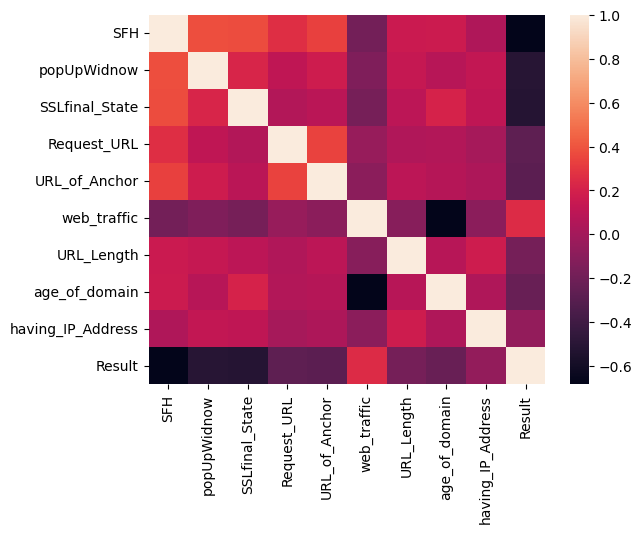

In [21]:
import seaborn as sns

sns.heatmap(data.corr())

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [23]:
y=data.pop('Result')
#присваиваем y целевой признак, удаляем его из датасета

In [24]:
x=data
#присваиваем датасет x

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
dtypes: int64(9)
memory usage: 95.3 KB


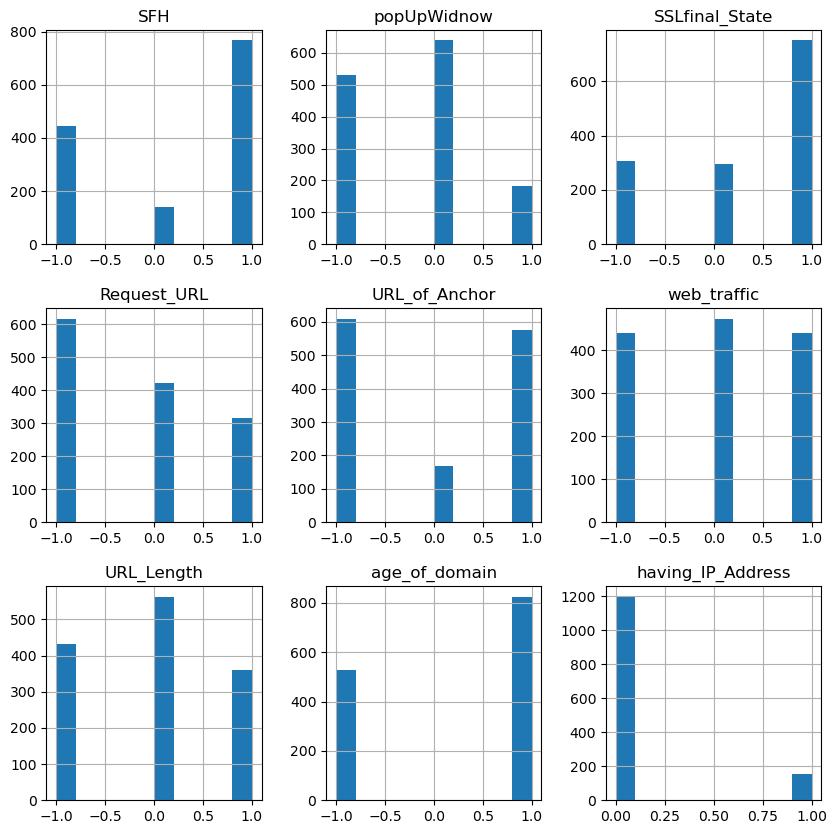

In [26]:
#Визуализируем распределения признаков в датасете
_ =x.hist(x.columns, figsize=(10, 10))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# разбиваем датасет на выборки

In [53]:
from sklearn.linear_model import LogisticRegression

In [29]:
#строим и обучаем модель логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# cмотрим метрику Accuracy для тренировочных и тестовых данных, делаем проверку на кросс-валидации
print('Accuracy for train set:', log_reg.score(X_train, y_train), 
      '; for test set:', log_reg.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(log_reg, x, y, cv=5)))

Accuracy for train set: 0.8308687615526802 ; for test set: 0.8450184501845018 ; cross-validation: 0.8285581522481891


In [33]:
# пробуем повысить точность
# добавляем полиномиальные признаки
# наиболее высокую точность дает 5 степень
# увеличиваем максимальное число итераций до 500
# уменьшаем значение c до 0.01 для усиления регуляризации и борьбы с переобучением, 
# т.к. точность на тренировочных данных значительно превышает точность на тестовой выборке и кросс-валидации и близка к единице
pol_log_reg = Pipeline([('poly', PolynomialFeatures(degree = 5)),
                        ('regr', LogisticRegression(C=0.01, max_iter=500))])
pol_log_reg.fit(X_train, y_train)
print('Accuracy for train set:', pol_log_reg.score(X_train, y_train), 
      '; for test set:', pol_log_reg.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(pol_log_reg, x, y, cv=5)))
# после добавления полиномиальных признаков точность на кросс-валидации улучшилась до 0.8898947656143228

Accuracy for train set: 0.9408502772643254 ; for test set: 0.8708487084870848 ; cross-validation: 0.8898947656143228


In [34]:
param_grid = {'poly__degree': range(1, 7),
              'regr__C': [0.001, 0.01, 0.1, 1, 5, 10],
              'regr__max_iter': [3000]}
grid_log_reg = GridSearchCV(pol_log_reg, param_grid, cv=5)
#подберем оптимальные параметры, увеличим максимальное число итераций для сходимости метода.

In [35]:
grid_log_reg.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                                       ('regr',
                                        LogisticRegression(C=0.01,
                                                           max_iter=500))]),
             param_grid={'poly__degree': range(1, 7),
                         'regr__C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'regr__max_iter': [3000]})

In [36]:
grid_log_reg.best_score_

0.8906382397157305

In [37]:
grid_log_reg.best_params_

{'poly__degree': 4, 'regr__C': 0.1, 'regr__max_iter': 3000}

In [38]:
#добавим масштабатор MinMaxScaler, чтобы все значения были в промежутке [0,1]
#было увеличино число итераций для сходимости метода
#с увеличено до 0.1
pol_log_reg_mm = Pipeline([('poly', PolynomialFeatures(degree = 5)),
                        ('scaler', MinMaxScaler()),
                        ('regr', LogisticRegression(C=0.1, max_iter=1000))])
pol_log_reg_mm.fit(X_train, y_train)
print('Accuracy for train set:', pol_log_reg_mm.score(X_train, y_train), 
      '; for test set:', pol_log_reg_mm.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(pol_log_reg_mm, x, y, cv=5)))
# точность на кросс-валидации улучшилась до 0.8921142544758782

Accuracy for train set: 0.9565619223659889 ; for test set: 0.8671586715867159 ; cross-validation: 0.8921142544758782


In [39]:
param_grid = {'poly__degree': range(1, 7),
              'regr__C': [0.001, 0.01, 0.1, 1, 5, 10],
              'regr__max_iter': [3000]}
grid_log_reg_mm = GridSearchCV(pol_log_reg_mm, param_grid, cv=5)
#подберем оптимальные параметры, увеличим максимальное число итераций для сходимости метода.

In [40]:
grid_log_reg_mm.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                                       ('scaler', MinMaxScaler()),
                                       ('regr',
                                        LogisticRegression(C=0.1,
                                                           max_iter=1000))]),
             param_grid={'poly__degree': range(1, 7),
                         'regr__C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'regr__max_iter': [3000]})

In [41]:
grid_log_reg_mm.best_score_

0.8950635506355062

In [42]:
grid_log_reg_mm.best_params_

{'poly__degree': 3, 'regr__C': 1, 'regr__max_iter': 3000}

Лучший результат для модели логистической регрессии - 0.8950635506355062, достигнут при степени полинома - 3, коэффициенте регуляризации 1 и использовании масштабатора MinMaxScaler

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB

In [44]:
# попробуем использовать наивный Байесовский классификатор
# используем Гаусовский наивный Байес с параметром сглаживания 0.1
gnb = Pipeline([('nb', GaussianNB(var_smoothing=0.1))])
gnb.fit(X_train, y_train)
print('Accuracy for train set:', gnb.score(X_train, y_train), 
      '; for test set:', gnb.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(gnb, x, y, cv=5)))
# его точность ниже чем у регрессии с полиномиальными признаками
# данный вариант Байесовского классификатора не очень хорошо подходит к данному датасету,
# т.к. он хорошо работает на числовых признаках с нормальным распределением,
# а в данном датасете большинство признаков представлены значениями -1, 0 и 1, которые не распределены по нормальному закону.
# В таком случае, может быть более подходящим использование классификатора наивного Байеса с мультиномиальным распределением

Accuracy for train set: 0.8299445471349353 ; for test set: 0.7933579335793358 ; cross-validation: 0.8248407817411507


In [45]:
# используем MinMaxScaler для приведения данных в промежуток [0,1] 
#т.к. данный классификатор на работает с отрицательлными значениями
mnb = Pipeline([('scaler', MinMaxScaler()),
                ('nb', MultinomialNB(alpha=0.1))])
mnb.fit(X_train, y_train)
print('Accuracy for train set:', mnb.score(X_train, y_train), 
      '; for test set:', mnb.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(mnb, x, y, cv=5)))
# его точность ниже чем у регрессии с полиномиальными признаками

Accuracy for train set: 0.7495378927911276 ; for test set: 0.7011070110701108 ; cross-validation: 0.7413502801694685


In [46]:
# Используем категориальный Байесовский классификатор
# используем MinMaxScaler для приведения данных в промежуток [0,1] 
#т.к. данный классификатор на работает с отрицательлными значениями
cnb = Pipeline([('scaler', MinMaxScaler()),
                ('nb', CategoricalNB(alpha=0.1))])
cnb.fit(X_train, y_train)
print('Accuracy for train set:', cnb.score(X_train, y_train), 
      '; for test set:', cnb.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(cnb, x, y, cv=5)))
# его точность ниже чем у регрессии с полиномиальными признаками

Accuracy for train set: 0.8253234750462107 ; for test set: 0.7933579335793358 ; cross-validation: 0.8196774634413011


In [47]:
# Попробуем использовать Байесовкский классификатор с распределением Бернулли,
# т.к.в датасете встречаются бинарные признаки
bnb = Pipeline([('nb', BernoulliNB(alpha=0.1))])
bnb.fit(X_train, y_train)
print('Accuracy for train set:', bnb.score(X_train, y_train), 
      '; for test set:', bnb.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(bnb, x, y, cv=5)))
# его точность ниже чем у регрессии с полиномиальными признаками

Accuracy for train set: 0.8253234750462107 ; for test set: 0.7933579335793358 ; cross-validation: 0.8196774634413011


In [48]:
from sklearn.svm import LinearSVC

In [99]:
# Попробуем использовать метод опорных векторов
rbf = LinearSVC(C=1)
rbf.fit(X_train, y_train)
print('Accuracy for train set:', rbf.score(X_train, y_train), 
      '; for test set:', rbf.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(rbf, x, y, cv=5)))
# результат лучше чем при использовании наивного Байесовского классификатора,
# но хуже чем у логистической регрессии с добавлением полиномиальных признаков

Accuracy for train set: 0.8345656192236599 ; for test set: 0.8228782287822878 ; cross-validation: 0.8315101817684842


C:\Users\tat0e\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tat0e\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tat0e\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tat0e\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tat0e\anaconda3\Lib\site-packages\sklearn\svm\_clas

In [49]:
from sklearn.svm import SVC

In [97]:
# Метод опорных векторов с выбором нелинейного ядра
# увеличим коэффициент с для снижения влияния регуляризации
rbfn = SVC(C=8)
rbfn.fit(X_train, y_train)
print('Accuracy for train set:', rbfn.score(X_train, y_train), 
      '; for test set:', rbfn.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(rbfn, x, y, cv=5)))
# на данный момент получена самая высокая точность на кросс-валидации - 0.9046849801831351

Accuracy for train set: 0.9473197781885397 ; for test set: 0.8929889298892989 ; cross-validation: 0.9046849801831351


In [39]:
# попробуем изменить ядро на полиномиальное и установить степень 5
poly_svc = SVC(C=8, kernel='poly', degree=5, max_iter=3000)
poly_svc.fit(X_train, y_train)
print('Accuracy for train set:', poly_svc.score(X_train, y_train), 
      '; for test set:', poly_svc.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(poly_svc, x, y, cv=5)))
# точность на кросс-валидации немного снизилась

Accuracy for train set: 0.944547134935305 ; for test set: 0.8671586715867159 ; cross-validation: 0.8751209512095122


In [130]:
# попробуем подобрать оптимальные параметры
param_grid_svc = {'degree': range(1, 7),
                  'C': [0.001, 0.01, 0.1, 1, 5, 10],
                  'max_iter': [15000]}
grid_poly_svc = GridSearchCV(poly_svc, param_grid_svc, cv=5)

In [131]:
grid_poly_svc.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(C=8, degree=5, kernel='poly', max_iter=3000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'degree': range(1, 7), 'max_iter': [15000]})

In [132]:
grid_poly_svc.best_score_
# точность на кросс-валидации - 0.8906355063550635, что ниже чем 0.9046849801831351

0.8906355063550635

In [133]:
grid_poly_svc.best_params_

{'C': 10, 'degree': 3, 'max_iter': 15000}

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
# воспользуемся деревом решений
# установим максимальную глубину 8 и минимальный размер конечного узла 2 для предотвращения переобучения
dtc = DecisionTreeClassifier(min_samples_leaf=2, max_depth=8)
dtc.fit(X_train, y_train)
print('Accuracy for train set:', dtc.score(X_train, y_train), 
      '; for test set:', dtc.score(X_test, y_test), 
      '; cross-validation:', np.mean(cross_val_score(dtc, x, y, cv=5)))
# точность на кросс-валидации не улучшилась - 0.8906382397157305

Accuracy for train set: 0.9399260628465804 ; for test set: 0.8487084870848709 ; cross-validation: 0.8906382397157305


In [166]:
# подберем оптимальные параметры
param_grid_tr = {
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_depth': [None, 2, 4, 6, 8, 10, 12]
}
grid_search_tr = GridSearchCV(dtc, param_grid_tr, cv=5)

grid_search_tr.fit(x, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=8, min_samples_leaf=2),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [167]:
grid_search_tr.best_score_

0.8958070247369141

In [168]:
grid_search_tr.best_params_

{'max_depth': 8, 'min_samples_leaf': 1}

На данный момент лучшую точность на кросс валидации дал метод опорных векторов с выбором нелинейного ядра - 0.9046849801831351.
Данный метод хорошо себя показывает на данных, в которых много входных признаков.

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
# Попробуем использовать ансамбли моделей
# случайный лес
rfc=RandomForestClassifier(n_estimators=200, max_samples=0.9, max_depth=8, min_samples_leaf=1)
rfc.fit(X_train, y_train)
print('Accuracy for train set: ', rfc.score(X_train, y_train),
     '; for test set: ', rfc.score(X_test, y_test),
     '; cross-validation: ', np.mean(cross_val_score(rfc, x, y, cv=5)))
# точность на кросс-валидации немного ниже чем при использовании метода опорных векторов с выбором нелинейного ядра - 0,9024627579609129

Accuracy for train set:  0.9537892791127541 ; for test set:  0.8634686346863468 ; cross-validation:  0.9024627579609129


In [243]:
# подбор оптимальных параметров
param_grid_rf = {
    'n_estimators': [3, 5, 10, 50, 100, 150, 200, 300, 500],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
    'max_samples': [0.1, 0.5, 0.9, 1, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(rfc, param_grid_rf, cv=5)

grid_search_rf.fit(x, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, max_samples=0.9,
                                              n_estimators=200),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                         'max_samples': [0.1, 0.5, 0.9, 1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [3, 5, 10, 50, 100, 150, 200, 300,
                                          500]})

In [244]:
grid_search_rf.best_score_
# точность на кросс-валидации немного ниже чем при использовании метода опорных векторов с выбором нелинейного ядра - 0.9024600246002459

0.9024600246002459

In [245]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [35]:
from catboost import CatBoostClassifier

In [36]:
# Используем модель градиентного бустинга (CatBoost)
#количество деревьев 3, глубина деревьев 15, скорость обучения 0.5 для лучшей точности и предотвращения переобучения
cb=CatBoostClassifier(n_estimators=3, depth=15, learning_rate=0.5, verbose=False)
cb.fit(X_train, y_train)
print('Accuracy for train set: ',cb.score(X_train, y_train),
     '; for test set: ', cb.score(X_test, y_test),
     '; cross-validation: ', np.mean(cross_val_score(cb, x, y, cv=5)))
# точность на кросс-валидации уступает точности метода опорных векторов с выбором нелинейного ядра

Accuracy for train set:  0.8613678373382625 ; for test set:  0.8376383763837638 ; cross-validation:  0.8692168921689216


In [295]:
# подбор оптимальных параметров
param_grid_cb = {
    'n_estimators': [3, 5, 10, 50, 100, 150, 200, 300, 500],
    'depth': [3, 5, 8, 10, 12, 14, 16],
    'learning_rate': [0.1, 0.5, 0.9, 1]
}

grid_search_cb = GridSearchCV(cb, param_grid_cb, cv=5)

grid_search_cb.fit(x, y)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B5154AB6D0>,
             param_grid={'depth': [3, 5, 8, 10, 12, 14, 16],
                         'learning_rate': [0.1, 0.5, 0.9, 1],
                         'n_estimators': [3, 5, 10, 50, 100, 150, 200, 300,
                                          500]})

In [296]:
grid_search_cb.best_score_

0.9068962689626895

In [297]:
grid_search_cb.best_params_
# Использование модели градиентного бустинга (CatBoost) с параметрами 'depth': 3, 'learning_rate': 1, 'n_estimators': 100
# дало на данный момент максимальную точность - 0.9068962689626895

{'depth': 3, 'learning_rate': 1, 'n_estimators': 100}

In [46]:
from xgboost import XGBClassifier

In [47]:
from sklearn.preprocessing import LabelEncoder

In [44]:
# Используем модель градиентного бустинга (xgboost)
#количество деревьев 3, глубина деревьев 8, гамма 0.1, скорость обучения 0.5, для лучшей точности предотвращения переобучения
label_encoder = LabelEncoder()
# перекодирование целевых меток -1, 0 и 1 в 0, 1, 2
y_encoded_train = label_encoder.fit_transform(y_train)
y_encoded_test = label_encoder.fit_transform(y_test)
y_encoded = label_encoder.fit_transform(y)

xgb=XGBClassifier(n_estimators=3, max_depth=8, gamma = 0.1, learning_rate=0.5)
xgb.fit(X_train, y_encoded_train)
print('Accuracy for train set: ',xgb.score(X_train, y_encoded_train),
     '; for test set: ', xgb.score(X_test, y_encoded_test),
     '; cross-validation: ', np.mean(cross_val_score(xgb, x, y_encoded, cv=5)))

Accuracy for train set:  0.94362292051756 ; for test set:  0.8892988929889298 ; cross-validation:  0.9032034987016537


In [48]:
# подбор оптимальных параметров
param_grid_xgb = {
    'n_estimators': [3, 5, 10, 50, 100, 150, 200, 300, 500],
    'max_depth': [3, 5, 8, 10, 15, 20, 25],
    'learning_rate': [0.1, 0.5, 0.9, 1],
    'gamma': [0.05, 0.1, 0.5, 0.9, 1, 10]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)

grid_search_xgb.fit(x, y_encoded)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.1,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.5, ma...
                                     max_delta_step=None, max_depth=8,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=3,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             param_grid={'gamma': [0.05, 0.1, 0.5, 0.9, 1, 10],
                         'learning_rate': [0.1, 0.5, 0.9, 1],
                         'max_depth': [3, 5, 8, 10, 15, 20, 25],
                         'n_estimators': [3, 5, 10, 50, 100, 150, 200, 300,
                                          500]})

In [50]:
grid_search_xgb.best_score_

0.9098592319256525

In [51]:
grid_search_xgb.best_params_
# Использование модели градиентного бустинга (xgboost) с параметрами depth: 5, learning_rate: 0.9, n_estimators: 50, gamma: 0.1,
# дало на данный момент максимальную точность - 0.9098592319256525

{'gamma': 0.1, 'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 50}

In [52]:
from sklearn.ensemble import VotingClassifier

In [57]:
# используем голосующие классификаторы, составленные из одиночных моделей, давших наилучшие результаты
vtc = VotingClassifier([('poly', Pipeline([
                        ('poly', PolynomialFeatures(degree=3)),
                        ('scaler', MinMaxScaler()),
                        ('regr', LogisticRegression(C=1, max_iter=3000))])),
                        ('dtc', DecisionTreeClassifier(min_samples_leaf=1, max_depth=8)),
                        ('svc', SVC(C=8))])
vtc.fit(X_train, y_train)
print('Accuracy for train:', vtc.score(X_train, y_train), 
      '; for test:', vtc.score(X_test, y_test), 
      '; for CV:', np.mean(cross_val_score(vtc, x, y, cv=4)))

Accuracy for train: 0.9547134935304991 ; for test: 0.9003690036900369 ; for CV: 0.8972766228552478


вывод: лучшую точность на кросс-валидации показала модель градиентного бустинга (xgboost) с параметрами depth: 5, learning_rate: 0.9, n_estimators: 50, gamma: 0.1. Градиентный бустинг хорошо работает с категориальными признаками (большинство признаков содержат значения -1, 0, 1, которые могут интерпретироваться как категории). Настройка праметров глубины и коэффициента гамма позволяет бороться с переобучением. Глубина определяет, насколько далеко разветвляется каждое дерево перед тем, как сделать прогноз. Увеличение глубины может увеличить точность модели, но также может привести к переобучению, особенно если данных недостаточно. Гамма - это параметр регуляризации, который помогает контролировать сложность модели. Он определяет, когда будет производиться разделение на ветви дерева. Чем выше значение гаммы, тем больше данные должны отличаться, чтобы произошло разделение. Это помогает снизить переобучение. Таким образом, наиболее оптимальными для предотвращения переобучения и высокой точности на кросс-валидации была выбрана небольшая глубина дерева - 5, и параметр гамма - 0.1. Количество деревьев решений, которые будут использоваться в модели - 50. Обычно большее количество деревьев может повысить точность модели, но при этом она может быть склонна к переобучению, но этот момент контролируется с помощью огранниченной глубины каждого дерева и коэффициента гамма. learning_rate: 0.9 - этот параметр определяет скорость обучения модели. Это величина, на которую модель изменяет свои прогнозы на каждой итерации обучения. Более высокая скорость обучения позволяет модели быстрее адаптироваться к данным.